
# Peer-graded Assignment: Test a Multiple Regression Model

In [2]:

# Install a pip package in the current Jupyter kernel
import sys

!{sys.executable} -m pip install numpy --upgrade --quiet

In [3]:

# Install a pip package in the current Jupyter kernel
import sys

!{sys.executable} -m pip install pandas --upgrade --quiet

In [4]:

# Install a pip package in the current Jupyter kernel
import sys

!{sys.executable} -m pip install matplotlib --upgrade --quiet

In [5]:

# Install a pip package in the current Jupyter kernel
import sys

!{sys.executable} -m pip install statsmodels --upgrade --quiet

In [6]:

# Install a pip package in the current Jupyter kernel
import sys

!{sys.executable} -m pip install seaborn --upgrade --quiet

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

C:\Users\dev\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:

print(pd.describe_option('display.float_format'))

display.float_format : callable
    The callable should accept a floating point number and return
    a string with the desired format of the number. This is used
    in some places like SeriesFormatter.
    See formats.format.EngFormatter for an example.
    [default: None] [currently: None]


None


In [3]:

# Bug fix for display formats to avoid run time errors
pd.set_option('display.float_format', lambda x:'%.2f'%x)

In [4]:

%run ../../../load_magic/storage.py
%who

data_folder: ../../data/
saves_folder: ../../saves/
attempt_to_pickle	 data_folder	 encoding	 load_csv	 load_dataframes	 load_object	 np	 os	 pd	 
pickle	 plt	 save_dataframes	 saves_folder	 sm	 smf	 sns	 store_objects	 


In [5]:

gapminder_df = load_object('gapminder_df')
gapminder_df.columns

Index(['country_name', 'income_per_person', 'alcohol_consumption',
       'armed_forces_rate', 'breast_cancer_per100th', 'co2_emissions',
       'female_employ_rate', 'hiv_rate', 'internet_use_rate',
       'life_expectancy', 'oil_per_person', 'polity_score',
       'electricity_per_person', 'suicide_per100th', 'employ_rate',
       'urban_rate'],
      dtype='object')

In [6]:

%run ../../../load_magic/dataframes.py
%who

attempt_to_pickle	 data_folder	 encoding	 example_iterrows	 gapminder_df	 get_column_descriptions	 load_csv	 load_dataframes	 load_object	 
math	 np	 os	 pd	 pickle	 plt	 save_dataframes	 saves_folder	 sm	 
smf	 sns	 store_objects	 



<p>This week's assignment is to test a multiple regression model.</p>
<p><strong>Data preparation for this assignment:</strong></p>
<p>1) If your response variable is categorical, you will need to identify a quantitative variable in the data set that you can use as a response variable for this assignment. Variables with response scales with 4-5 values that represent a change in magnitude (eg, "strongly disagree to strongly agree", "never to often") can be considered quantitative for the assignment.</p>

In [7]:

get_column_descriptions(gapminder_df, column_list=None).sort_values('count_uniques', ascending=False)

,column_name,dtype,count_blanks,count_uniques,count_zeroes,has_dates
15,country_name,object,0,289,0,False
4,co2_emissions,float64,77,213,0,True
14,urban_rate,float64,81,200,0,True
8,life_expectancy,float64,92,196,0,True
7,internet_use_rate,float64,97,193,0,True
0,income_per_person,float64,98,192,0,True
12,suicide_per100th,float64,98,192,0,True
1,alcohol_consumption,float64,102,181,0,True
2,armed_forces_rate,float64,125,165,1,True
5,female_employ_rate,float64,111,154,0,True


<p><strong>The assignment:</strong></p>
<p>Write a blog entry that summarize in a few sentences<ol><li>what you found in your multiple regression analysis. Discuss the results for the associations between <strong>all</strong> of your explanatory variables and your response variable. Make sure to include statistical results (Beta coefficients and p-values) in your summary.</li><ol>


## Hypothesis: CO<sub>2</sub> emissions is significantly and positively associated with oil per person, after adjusting for the potential confounding factor of urban rate

In [39]:

formal_name_dict = load_object('formal_name_dict')
informal_name_dict = load_object('informal_name_dict')
class Statements(object):

    def __init__(self, df, **kwargs):
        prop_defaults = {
            'qr_column_name': 'co2_emissions',
            'qpe_column_name': 'oil_per_person',
            'qse_column_name': 'urban_rate',
            
            'qr_formal_name': None,
            'qpe_formal_name': None,
            'qse_formal_name': None,
            
            'qr_informal_name': None,
            'qpe_informal_name': None,
            'qse_informal_name': None,
            
            'verbose_html': '',
        }

        for (prop, default) in prop_defaults.items():
            setattr(self, prop, kwargs.get(prop, default))
        
        # Initialize formal/informal names

        if self.qr_formal_name is None:
            self.qr_formal_name = formal_name_dict[self.qr_column_name]
        if self.qr_informal_name is None:
            self.qr_informal_name = informal_name_dict[self.qr_column_name]

        if self.qpe_formal_name is None:
            self.qpe_formal_name = formal_name_dict[self.qpe_column_name]
        if self.qpe_informal_name is None:
            self.qpe_informal_name = informal_name_dict[self.qpe_column_name]

        if self.qse_formal_name is None:
            self.qse_formal_name = formal_name_dict[self.qse_column_name]
        if self.qse_informal_name is None:
            self.qse_informal_name = informal_name_dict[self.qse_column_name]
        
        self.df = df.dropna(how='any').copy()
        self.row_count = self.df.shape[0]
        self.reserve_columns = ['country_name', self.qr_column_name, self.qpe_column_name]
        self.confounding_columns = self.df.columns.tolist()
        for column_name in self.reserve_columns:
            self.confounding_columns.remove(column_name)
        
        # Center quantitative IVs for regression analysis
        self.qpec_column_name = self.qpe_column_name + '_c'
        self.df[self.qpec_column_name] = (self.df[self.qpe_column_name] -
                                          self.df[self.qpe_column_name].mean())
        self.qsec_column_name = self.qse_column_name + '_c'
        self.df[self.qsec_column_name] = (self.df[self.qse_column_name] -
                                          self.df[self.qse_column_name].mean())
        self.centered_confounders = []
        for column_name in self.confounding_columns:
            centered_name = column_name + '_c'
            self.df[centered_name] = (self.df[column_name] - self.df[column_name].mean())
            self.centered_confounders.append(centered_name)

        # Use ols function for calculating the F-statistic and associated p value
        self.lra_formula = self.qr_column_name + ' ~ ' + self.qpec_column_name
        for column_name in self.centered_confounders:
            self.lra_formula += ' + ' + column_name
        self.lra_fitted = smf.ols(formula=self.lra_formula, data=self.df).fit()
        
        self.pvalues_series = sts.lra_fitted.pvalues
        mask_series = pvalues_series < 0.05
        self.significant_column_list = list(set(self
                                                .df.columns.tolist()) &
                                            set(self.pvalues_series[mask_series].index.tolist()))
        
        self.lra_coef_series = self.lra_fitted.params
        self.lra_qpec_beta = self.lra_coef_series[self.qpec_column_name]
        self.lra_qpec_beta_statement = str('%.2e' % self.lra_qpec_beta)
        self.lra_df_model_statement = str('%d' % self.lra_fitted.df_model)
        self.lra_df_resid_statement = str('%d' % self.lra_fitted.df_resid)
        self.lra_fvalue_statement = str('%.2f' % self.lra_fitted.fvalue)
        self.lra_f_pvalue = self.lra_fitted.f_pvalue
        if self.lra_f_pvalue < 0.0001:
            self.lra_f_pvalue_statement = '&lt;0.0001'
        else:
            self.lra_f_pvalue_statement = '=' + str('%.4f' % self.lra_f_pvalue)

        # Figure out the adverbs
        if self.lra_f_pvalue <= 0.05:
            self.lra_adverb_significant = 'significantly'
        else:
            self.lra_adverb_significant = 'insignificantly'
        if self.lra_qpec_beta <= 0:
            self.lra_adverb_positive = 'negatively'
        else:
            self.lra_adverb_positive = 'positively'

In [62]:

from IPython.display import HTML, Image

def conjunctify_list(noun_list):
    
    return ', and '.join([', '.join(noun_list[:-1])] + [noun_list[-1]])

def model_interpretation(sts, sample_name='the population', verbose=False):
        
    # Analysis of Variance (ANOVA)
    confounding_factor_list = conjunctify_list([informal_name_dict[column_name] for column_name in sts.confounding_columns])
    sts.test_type_html = ('<h3>Model Interpretation for ANOVA, Testing a Multiple Regression Model:</h3>' +
                          '<p>After adjusting for potential confounding factors (' +
                          confounding_factor_list + '), ' +
                          sts.qpe_informal_name + ' (Beta=' +
                          sts.lra_qpec_beta_statement + ', p' +
                          sts.lra_f_pvalue_statement + ') was ' +
                          sts.lra_adverb_significant + ' and ' +
                          sts.lra_adverb_positive + ' associated with ' +
                          sts.qr_informal_name + '. Age was also significantly associated with nicotine ' +
                          'dependence symptoms, such that older participants reported a greater number of ' +
                          'nicotine dependence symptoms (Beta= 0.76, p=.025).</p>')
    
    # From http://www.1x1px.me/
    file_path = data_folder +'png/FFFFFF-0.png'
    if verbose:
        
        # Analysis of Variance (ANOVA)
        sts.verbose_html += sts.lra_fitted.summary().as_html()
        #plot_Image = add_joint_plot(sts)
        #plot_Image = add_facet_grid(sts)

        # Q-Q plot for normality
        sts.lra_qq_fig = sm.qqplot(sts.lra_fitted.resid, line='r')
        
        # Simple plot of residuals
        sts.stdres_df = pd.DataFrame(sts.lra_fitted.resid_pearson)
        line2d_list = plt.plot(sts.stdres_df, 'o', ls=None)
        stdres_line2d = plt.axhline(y=0, color='r')
        ylabel_text = plt.ylabel('Standardized Residual')
        xlabel_text = plt.xlabel('Observation Number')

        # Additional regression diagnostic plots
        sts.diag_fig = plt.figure(figsize=(12,8))
        sts.diag_fig = sm.graphics.plot_regress_exog(sts.lra_fitted, sts.qsec_column_name, fig=sts.diag_fig)

        # Leverage plot
        sts.lev_fig = sm.graphics.influence_plot(sts.lra_fitted, size=8)

        plot_Image = Image(data=file_path)
            
    else:
        
        plot_Image = Image(data=file_path)
    
    return HTML(sts.test_type_html + sts.verbose_html), plot_Image

In [63]:

import IPython.display

def anova_with_confounding(sts, source_name='GapMinder.org', verbose=False):
    
    # Interpret explanatory variable against confounders
    sample_name = 'the sample of ' + str(sts.row_count) + ' countries from ' + source_name
    model_interpretation_HTML, plot_Image = model_interpretation(sts, sample_name, verbose)
    display(model_interpretation_HTML)
    display(plot_Image)

In [64]:

# CO2 emissions associated with oil per person,
# with the confounding factor of urban rate
response_variable = 'co2_emissions'
primary_explanatory_variable = 'oil_per_person'
secondary_explanatory_variable = 'urban_rate'
sts = Statements(df=gapminder_df, qr_column_name=response_variable,
                 qpe_column_name=primary_explanatory_variable,
                 qse_column_name=secondary_explanatory_variable)

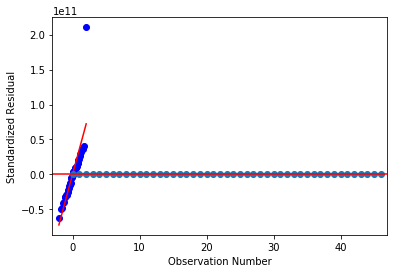

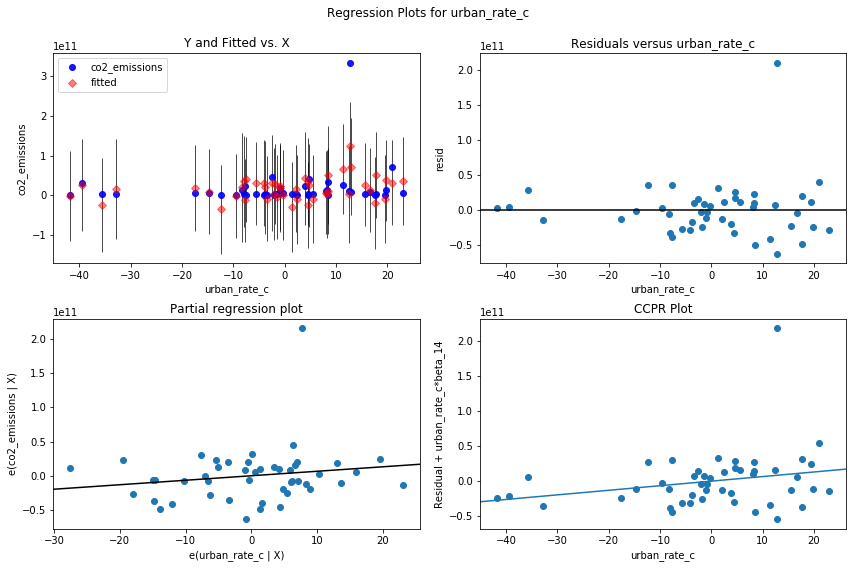

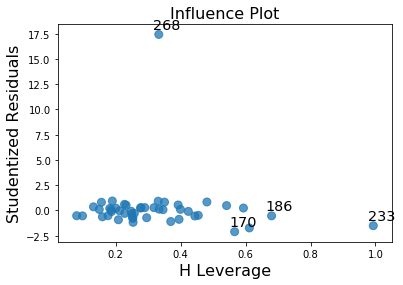

In [68]:

anova_with_confounding(sts, verbose=True)

In [57]:

# First order (linear) scatterplot
fig1_fig = plt.figure(figsize=(12,8))
scat1_axes_subplot = sns.regplot(x=primary_explanatory_variable, y=response_variable, scatter=True, data=sub1_df)
xlabel_text = plt.xlabel(informal_name_dict[primary_explanatory_variable])
ylabel_text = plt.ylabel(informal_name_dict[response_variable])
kwargs = dict(textcoords='offset points', ha='left', va='bottom',
              bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
              arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
for label, x, y in zip(sub1_df['country_name'], sub1_df[primary_explanatory_variable],
                            sub1_df[response_variable]):
    if (y > 1.0E11):
        annotation = plt.annotate(label, xy=(x, y), xytext=(20, -10), **kwargs)
    if (x > 6):
        annotation = plt.annotate(label, xy=(x, y), xytext=(-70, -10), **kwargs)

NameError: name 'sub1_df' is not defined

<Figure size 864x576 with 0 Axes>

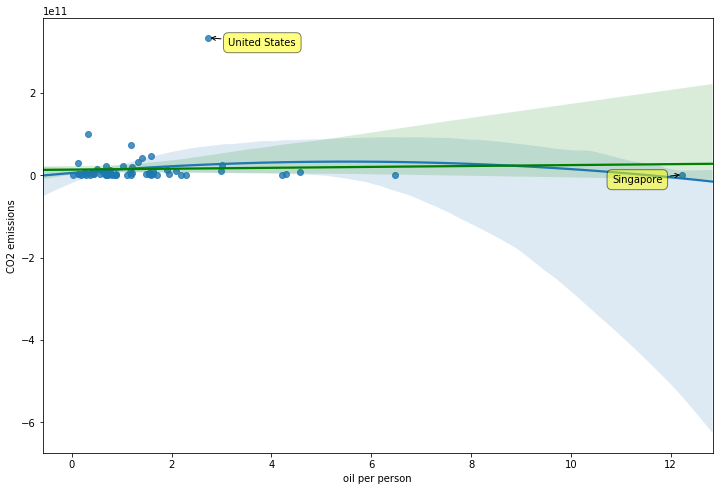

In [91]:

# Fit second order polynomial
fig2_fig = plt.figure(figsize=(12,8))
scat2_axes_subplot = sns.regplot(x=primary_explanatory_variable, y=response_variable, scatter=True, order=2,
                                 data=sub1_df)

# Run the 2 scatterplots together to get both linear and second order fit lines
scat3_axes_subplot = sns.regplot(x=primary_explanatory_variable, y=response_variable, scatter=True, order=1,
                                 data=sub1_df, ax=fig2_fig.get_axes()[0],
                                 scatter_kws=dict(s=0, edgecolors='w'), color='g')

xlabel_text = plt.xlabel(informal_name_dict[primary_explanatory_variable])
ylabel_text = plt.ylabel(informal_name_dict[response_variable])
kwargs = dict(textcoords='offset points', ha='left', va='bottom',
              bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
              arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
for label, x, y in zip(sub1_df['country_name'], sub1_df[primary_explanatory_variable],
                            sub1_df[response_variable]):
    if (y > 3.0E11):
        annotation = plt.annotate(label, xy=(x, y), xytext=(20, -10), **kwargs)
    if (x > 12):
        annotation = plt.annotate(label, xy=(x, y), xytext=(-70, -10), **kwargs)

In [69]:

dir(sts.lra_fitted)

['HC0_se', 'HC1_se', 'HC2_se', 'HC3_se', '_HCCM', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_cache', '_data_attr', '_get_robustcov_results', '_is_nested', '_wexog_singular_values', 'aic', 'bic', 'bse', 'centered_tss', 'compare_f_test', 'compare_lm_test', 'compare_lr_test', 'condition_number', 'conf_int', 'conf_int_el', 'cov_HC0', 'cov_HC1', 'cov_HC2', 'cov_HC3', 'cov_kwds', 'cov_params', 'cov_type', 'df_model', 'df_resid', 'diagn', 'eigenvals', 'el_test', 'ess', 'f_pvalue', 'f_test', 'fittedvalues', 'fvalue', 'get_influence', 'get_prediction', 'get_robustcov_results', 'initialize', 'k_constant', 'llf', 'load', 'model', 'mse_model', 'mse_resid', 'mse_total', 'nobs', 'normalized_cov_params'

In [76]:

significant_column_list

['income_per_person_c']

<ol start=2><li>Report whether your results supported your hypothesis for the association between your primary explanatory variable and the response variable.</li></ol>

In [ ]:

from IPython.display import HTML


HTML('Before adjusting for potential confounding factors (' +
     formal_name_dict[secondary_explanatory_variable] +
     '), major depression (Beta=1.34, p=.0001) was significantly and positively associated with number of nicotine dependence symptoms.')


<ol start=3><li>Discuss whether there was evidence of confounding for the association between your primary explanatory and response variable (Hint: adding additional explanatory variables to your model one at a time will make it easier to identify which of the variables are confounding variables); and</li></ol>


<ol start=4><li>generate the following regression diagnostic plots:
    <ol type='a'><li>q-q plot</li></ol>
    <ol type='a' start=2><li>standardized residuals for all observations</li></ol>
    <ol type='a' start=3><li>leverage plot</li></ol>
    <ol type='a' start=4><li>Write a few sentences describing what these plots tell you about your regression model in terms of the distribution of the residuals, model fit, influential observations, and outliers.</li></ol></li></ol>
<p><strong>What to Submit: Submit the URL for your blog entry. The blog entry should include 1) the summary of your results that addresses parts 1-4 of the assignment, 2) the output from your multiple regression model, and 3) the regression diagnostic plots.</strong></p>


<p>
    Your assessment will be based on the evidence you
    provide that you have completed all of the steps.
    When relevant, gradients in the scoring will be
    available to reward clarity (for example, you will get
    one point for submitting an inaccurate or incomplete description of your results, but two points if the description is
    accurate and complete). In all cases, consider that
    the peer assessing your work is likely not an expert
    in the field you are analyzing. You will be assessed
    equally on all parts of the assignment, and whether you post your output in your blog entry.
</p>


<p>After adjusting for potential confounding factors (list them), major depression (Beta=1.34, p=.0001) was significantly and positively associated with number of nicotine dependence symptoms. Age was also significantly associated with nicotine dependence symptoms, such that older participants reported a greater number of nicotine dependence symptoms (Beta= 0.76, p=.025).</p>

In [33]:

# Quadratic (polynomial) regression analysis

# Run following line of code if you get PatsyError 'ImaginaryUnit' object is not callable
#del I
reg2_fitted = smf.ols(response_variable + ' ~ ' + pe_variable_centered + ' + I(' + pe_variable_centered + '**2)',
                      data=sub1_df).fit()
print(reg2_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:     female_employ_rate   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     15.60
Date:                Sat, 17 Mar 2018   Prob (F-statistic):           6.30e-07
Time:                        11:27:39   Log-Likelihood:                -672.19
No. Observations:                 167   AIC:                             1350.
Df Residuals:                     164   BIC:                             1360.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              43.8428    


####################################################################################
# EVALUATING MODEL FIT
####################################################################################

In [35]:

# Adding secondary explanatory variable
nancy_str = response_variable + ' ~ ' + pe_variable_centered + ' + I(' + pe_variable_centered + '**2) + ' + se_variable_centered
reg3_fitted = smf.ols(nancy_str, data=sub1_df).fit()
print(reg3_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:     female_employ_rate   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     11.92
Date:                Sat, 17 Mar 2018   Prob (F-statistic):           4.25e-07
Time:                        11:32:00   Log-Likelihood:                -670.17
No. Observations:                 167   AIC:                             1348.
Df Residuals:                     163   BIC:                             1361.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              43.9886    

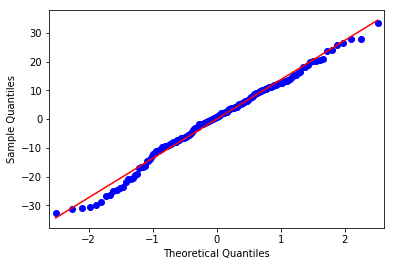

In [36]:

# Q-Q plot for normality
fig4_fig = sm.qqplot(reg3_fitted.resid, line='r')

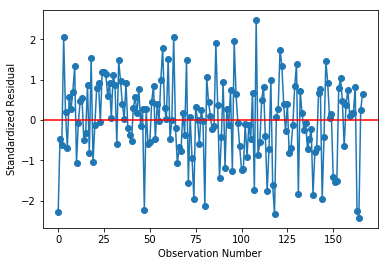

In [45]:

# Simple plot of residuals
stdres_df = pd.DataFrame(reg3_fitted.resid_pearson)
line2d_list = plt.plot(stdres_df, 'o', ls=None)
stdres_line2d = plt.axhline(y=0, color='r')
ylabel_text = plt.ylabel('Standardized Residual')
xlabel_text = plt.xlabel('Observation Number')

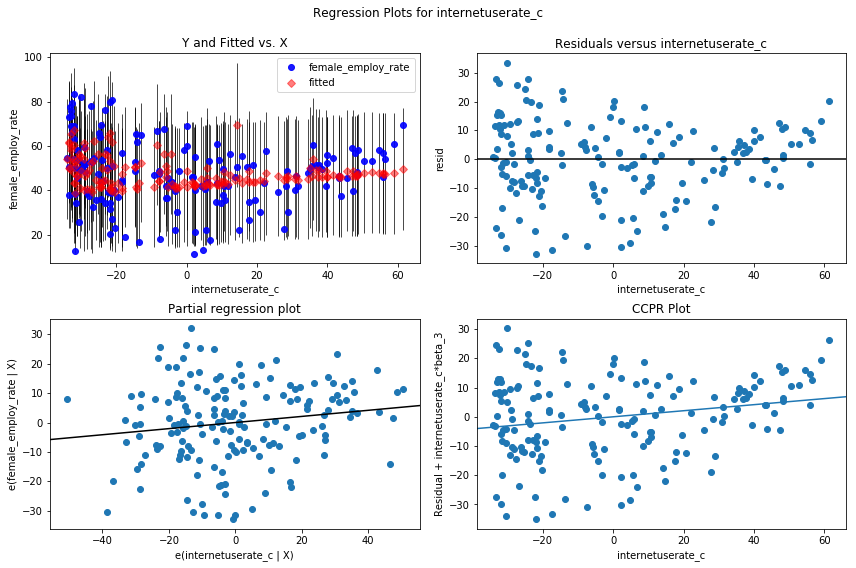

In [48]:

# Additional regression diagnostic plots
fig2_fig = plt.figure(figsize=(12,8))
fig2_fig = sm.graphics.plot_regress_exog(reg3_fitted,  se_variable_centered, fig=fig2_fig)

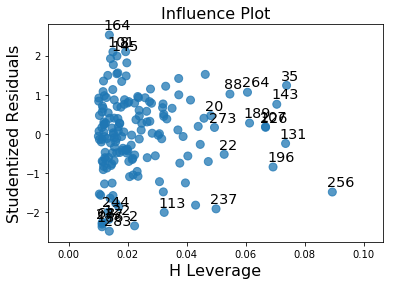

In [66]:

# Leverage plot
fig3_fig = sm.graphics.influence_plot(reg3_fitted, size=8)

In [65]:

reg3_influence = reg3_fitted.get_influence()
reg3_influence_df = reg3_influence.summary_frame()
reg3_influence_df.sample(5).T

,149,116,14,265,120
dfb_Intercept,-0.07,-0.00,0.00,0.04,-0.00
dfb_urbanrate_c,0.04,0.00,0.03,0.01,0.00
dfb_I(urbanrate_c ** 2),-0.00,0.00,0.04,-0.03,0.00
dfb_internetuserate_c,0.06,0.00,0.03,0.00,-0.00
cooks_d,0.01,0.00,0.00,0.00,0.00
dffits,-0.15,0.00,0.10,0.05,-0.01
dffits_internal,-0.15,0.00,0.10,0.05,-0.01
hat_diag,0.01,0.03,0.03,0.01,0.03
standard_resid,-1.25,0.01,0.58,0.48,-0.03
student_resid,-1.25,0.01,0.58,0.47,-0.03
